<a href="https://colab.research.google.com/github/StiperskiIvan/DoodlingRecognition/blob/main/DoodleTrainingProba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports




In [ ]:
import tensorflow as tf
import numpy as np
import urllib.request
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt
from random import randint
tf.__version__

'2.5.0'

Save classes names:

In [ ]:
classes=['The Eiffel Tower','The Great Wall of China','The Mona Lisa','aircraft carrier','airplane','alarm clock','ambulance','angel','animal migration','ant','anvil','apple','arm','asparagus','axe','backpack','banana','bandage','barn','baseball bat']
print(classes)

['The Eiffel Tower', 'The Great Wall of China', 'The Mona Lisa', 'aircraft carrier', 'airplane', 'alarm clock', 'ambulance', 'angel', 'animal migration', 'ant', 'anvil', 'apple', 'arm', 'asparagus', 'axe', 'backpack', 'banana', 'bandage', 'barn', 'baseball bat']


# Download the Dataset 

In [ ]:
!mkdir data

In [ ]:
base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
for c in classes:
    cls_url = c.replace(' ', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, 'data/'+c+'.npy')

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/The%20Eiffel%20Tower.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/The%20Great%20Wall%20of%20China.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/The%20Mona%20Lisa.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/aircraft%20carrier.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/alarm%20clock.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ambulance.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/angel.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/animal%20migration.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ant.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_b

# Load the data

In [ ]:
root='data'
vfold_ratio=0.2
max_items_per_class= 5000
all_files = glob.glob(os.path.join(root, '*.npy'))

#initialize variables 
x = np.empty([0, 784])
y = np.empty([0])
class_names = []
    
#load each data file 
for idx, file in enumerate(all_files):
    data = np.load(file)
    data = data[0: max_items_per_class, :]
    labels = np.full(data.shape[0], idx)

    x = np.concatenate((x, data), axis=0)
    y = np.append(y, labels)

    class_name, ext = os.path.splitext(os.path.basename(file))
    class_names.append(class_name)

data = None
labels = None
    
#randomize the dataset 
permutation = np.random.permutation(y.shape[0])
x = x[permutation, :]
y = y[permutation]

#separate into training and testing 
vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

x_test = x[0:vfold_size, :]
y_test = y[0:vfold_size]

x_train = x[vfold_size:x.shape[0], :]
y_train = y[vfold_size:y.shape[0]]
num_classes = len(class_names)
image_size = 28

# Print the number of testing and training data

In [ ]:
print('Number of training data points: ',len(x_train))
print('Number of testing data points: ',len(x_test))

Number of training data points:  80000
Number of testing data points:  20000


# Show random data

angel


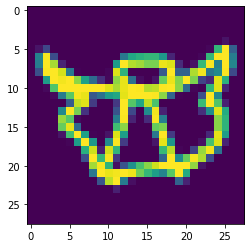

In [ ]:
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28))
test= class_names[int(y_train[idx].item())]
print(test)

# Preprocess the Data

In [ ]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size,1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical (y_train, num_classes)
y_test = keras.utils.to_categorical (y_test, num_classes)

In [ ]:
x_train.shape

(80000, 28, 28, 1)

#The model

In [ ]:
# Define model
model = keras.Sequential()

model.add(layers.Convolution2D(16, (3, 3), padding='same',input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))

#Model no.2 - test

In [ ]:
model = keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[28, 28, 1]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=20, activation='softmax'))


#Compile model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['top_k_categorical_accuracy'])
#model.compile(loss='sparse_categorical_crossentropy',optimizer="Adam",metrics=['sparse_categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

# Training

In [ ]:
model.fit(x_train, y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=5)

Epoch 1/5
282/282 - 37s - loss: 1.3373 - top_k_categorical_accuracy: 0.8717 - val_loss: 0.9787 - val_top_k_categorical_accuracy: 0.9296
Epoch 2/5
282/282 - 36s - loss: 0.8022 - top_k_categorical_accuracy: 0.9442 - val_loss: 0.7586 - val_top_k_categorical_accuracy: 0.9469
Epoch 3/5


KeyboardInterrupt: ignored

# Testing

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 95.03%


# Prediction

['backpack', 'banana', 'barn', 'angel', 'baseball bat']


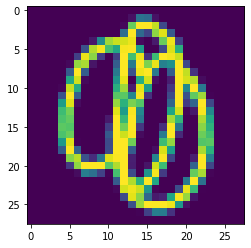

In [ ]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

# Model save

In [ ]:
model.save('pModel.h5')